In [7]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle, glob
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
channel_list = ["Tracks_pt", "Tracks_dZSig", "Tracks_d0Sig", "ECAL_energy",
"HBHE_energy", "Pix_1", "Pix_2", "Pix_3", "Pix_4", "Tib_1", "Tib_2",
"Tib_3", "Tib_4", "Tob_1", "Tob_2", "Tob_3", "Tob_4", "Tob_5",
"Tob_6", "Tid_1", "Tec_1", "Tec_2", "Tec_3"]

from scipy.stats import norm
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)


m0_min      = 0
m0_max      = 18
mtrue_bins = np.arange(m0_min, m0_max+.1, .4)
pt_bims = np.arange(30,301,5)

In [12]:
local='/bighome/bbbam/ResNet_Tau_decay_ch_12/12_ch_massregressor_ResNet/INFERENCE_DATA'
rhFileList = '%s/*.pkl'%(local)
paths = np.sort(glob.glob(rhFileList))
assert len(paths) > 0
print(f"{len(paths)} files found")

100 files found


loaded data file ------>  /bighome/bbbam/ResNet_Tau_decay_ch_12/12_ch_massregressor_ResNet/INFERENCE_DATA/epoch99__mae4.4956_inference_data.pkl


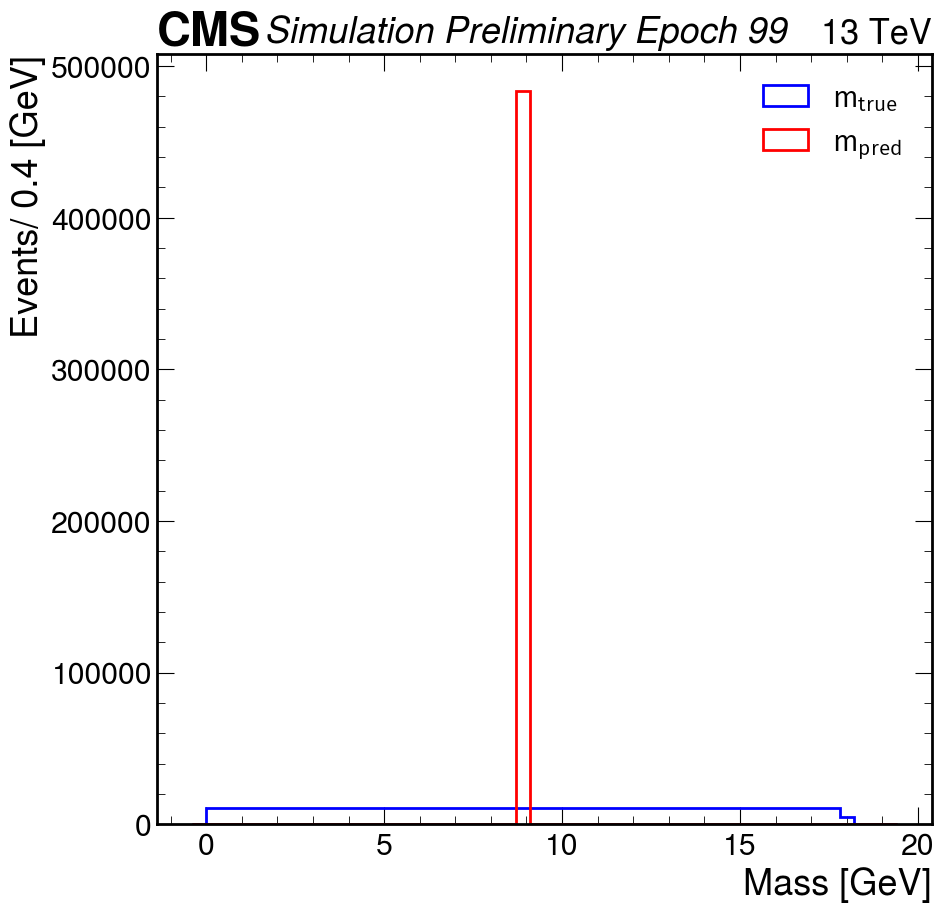

loaded data file ------>  /bighome/bbbam/ResNet_Tau_decay_ch_12/12_ch_massregressor_ResNet/INFERENCE_DATA/epoch100__mae4.4957_inference_data.pkl


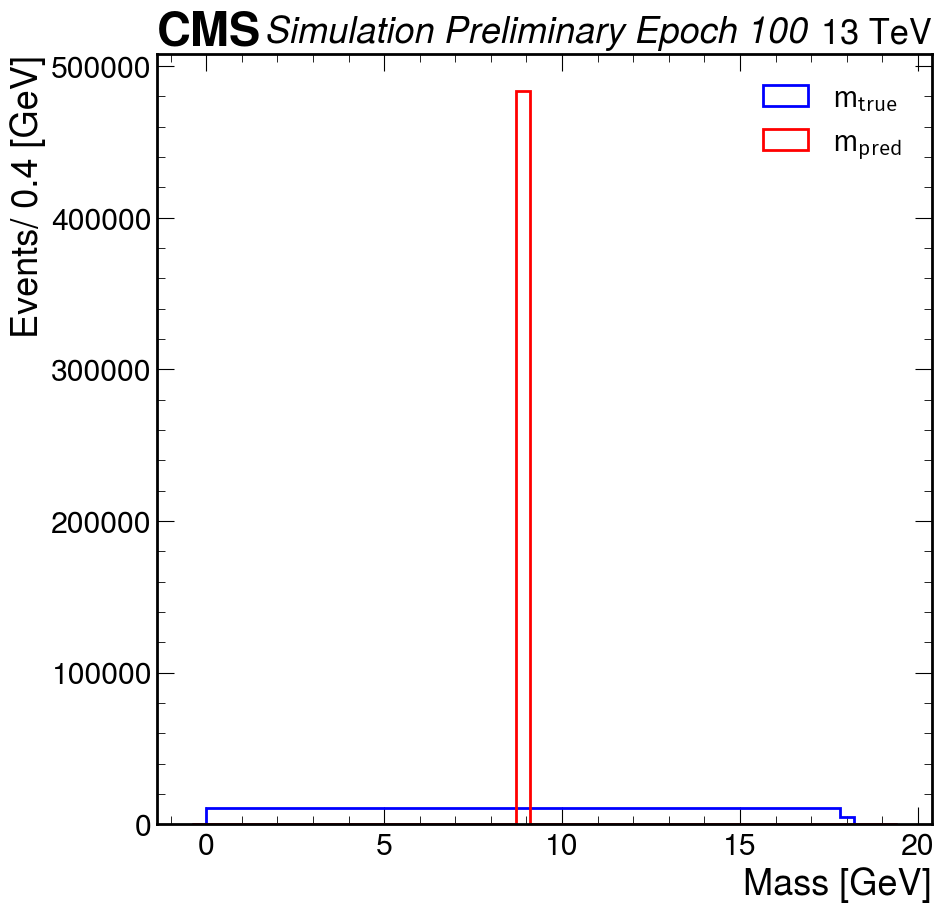

In [13]:
m0_min = 0.8
m0_max = 18.2
bin_size = 0.4
# for epoch in range(len(paths)):
for epoch in range(98,100):
    data_file = glob.glob(f'{local}/epoch{epoch+1}_*.pkl')[0]
    infile = open(f"{data_file}", "rb")
    data = pickle.load(infile)
    print(f"loaded data file ------>  {data_file}")
    infile.close()
    filter = (data["m_true"]>3.6) & (data["m_true"] <14)
    m_true_ = data["m_true"]
    m_pred_ = data["m_pred"]
    mae_ = data["mae"]
    mre_ = data["mre"]

    
    fig, ax = plt.subplots()
    plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
    plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
#     plt.xlim(m0_min-1.2,m0_max+1.2)
#     plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),size=15)
#     plt.grid(color='r', linestyle='--', linewidth=.1)
    plt.xlabel('Mass [GeV]')
    plt.ylabel('Events/ 0.4 [GeV]')
    # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
    plt.legend(loc='upper right')
    hep.cms.label(llabel=f"Simulation Preliminary Epoch {epoch+1}", rlabel="13 TeV", loc=0, ax=ax)
    # plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
    plt.show()

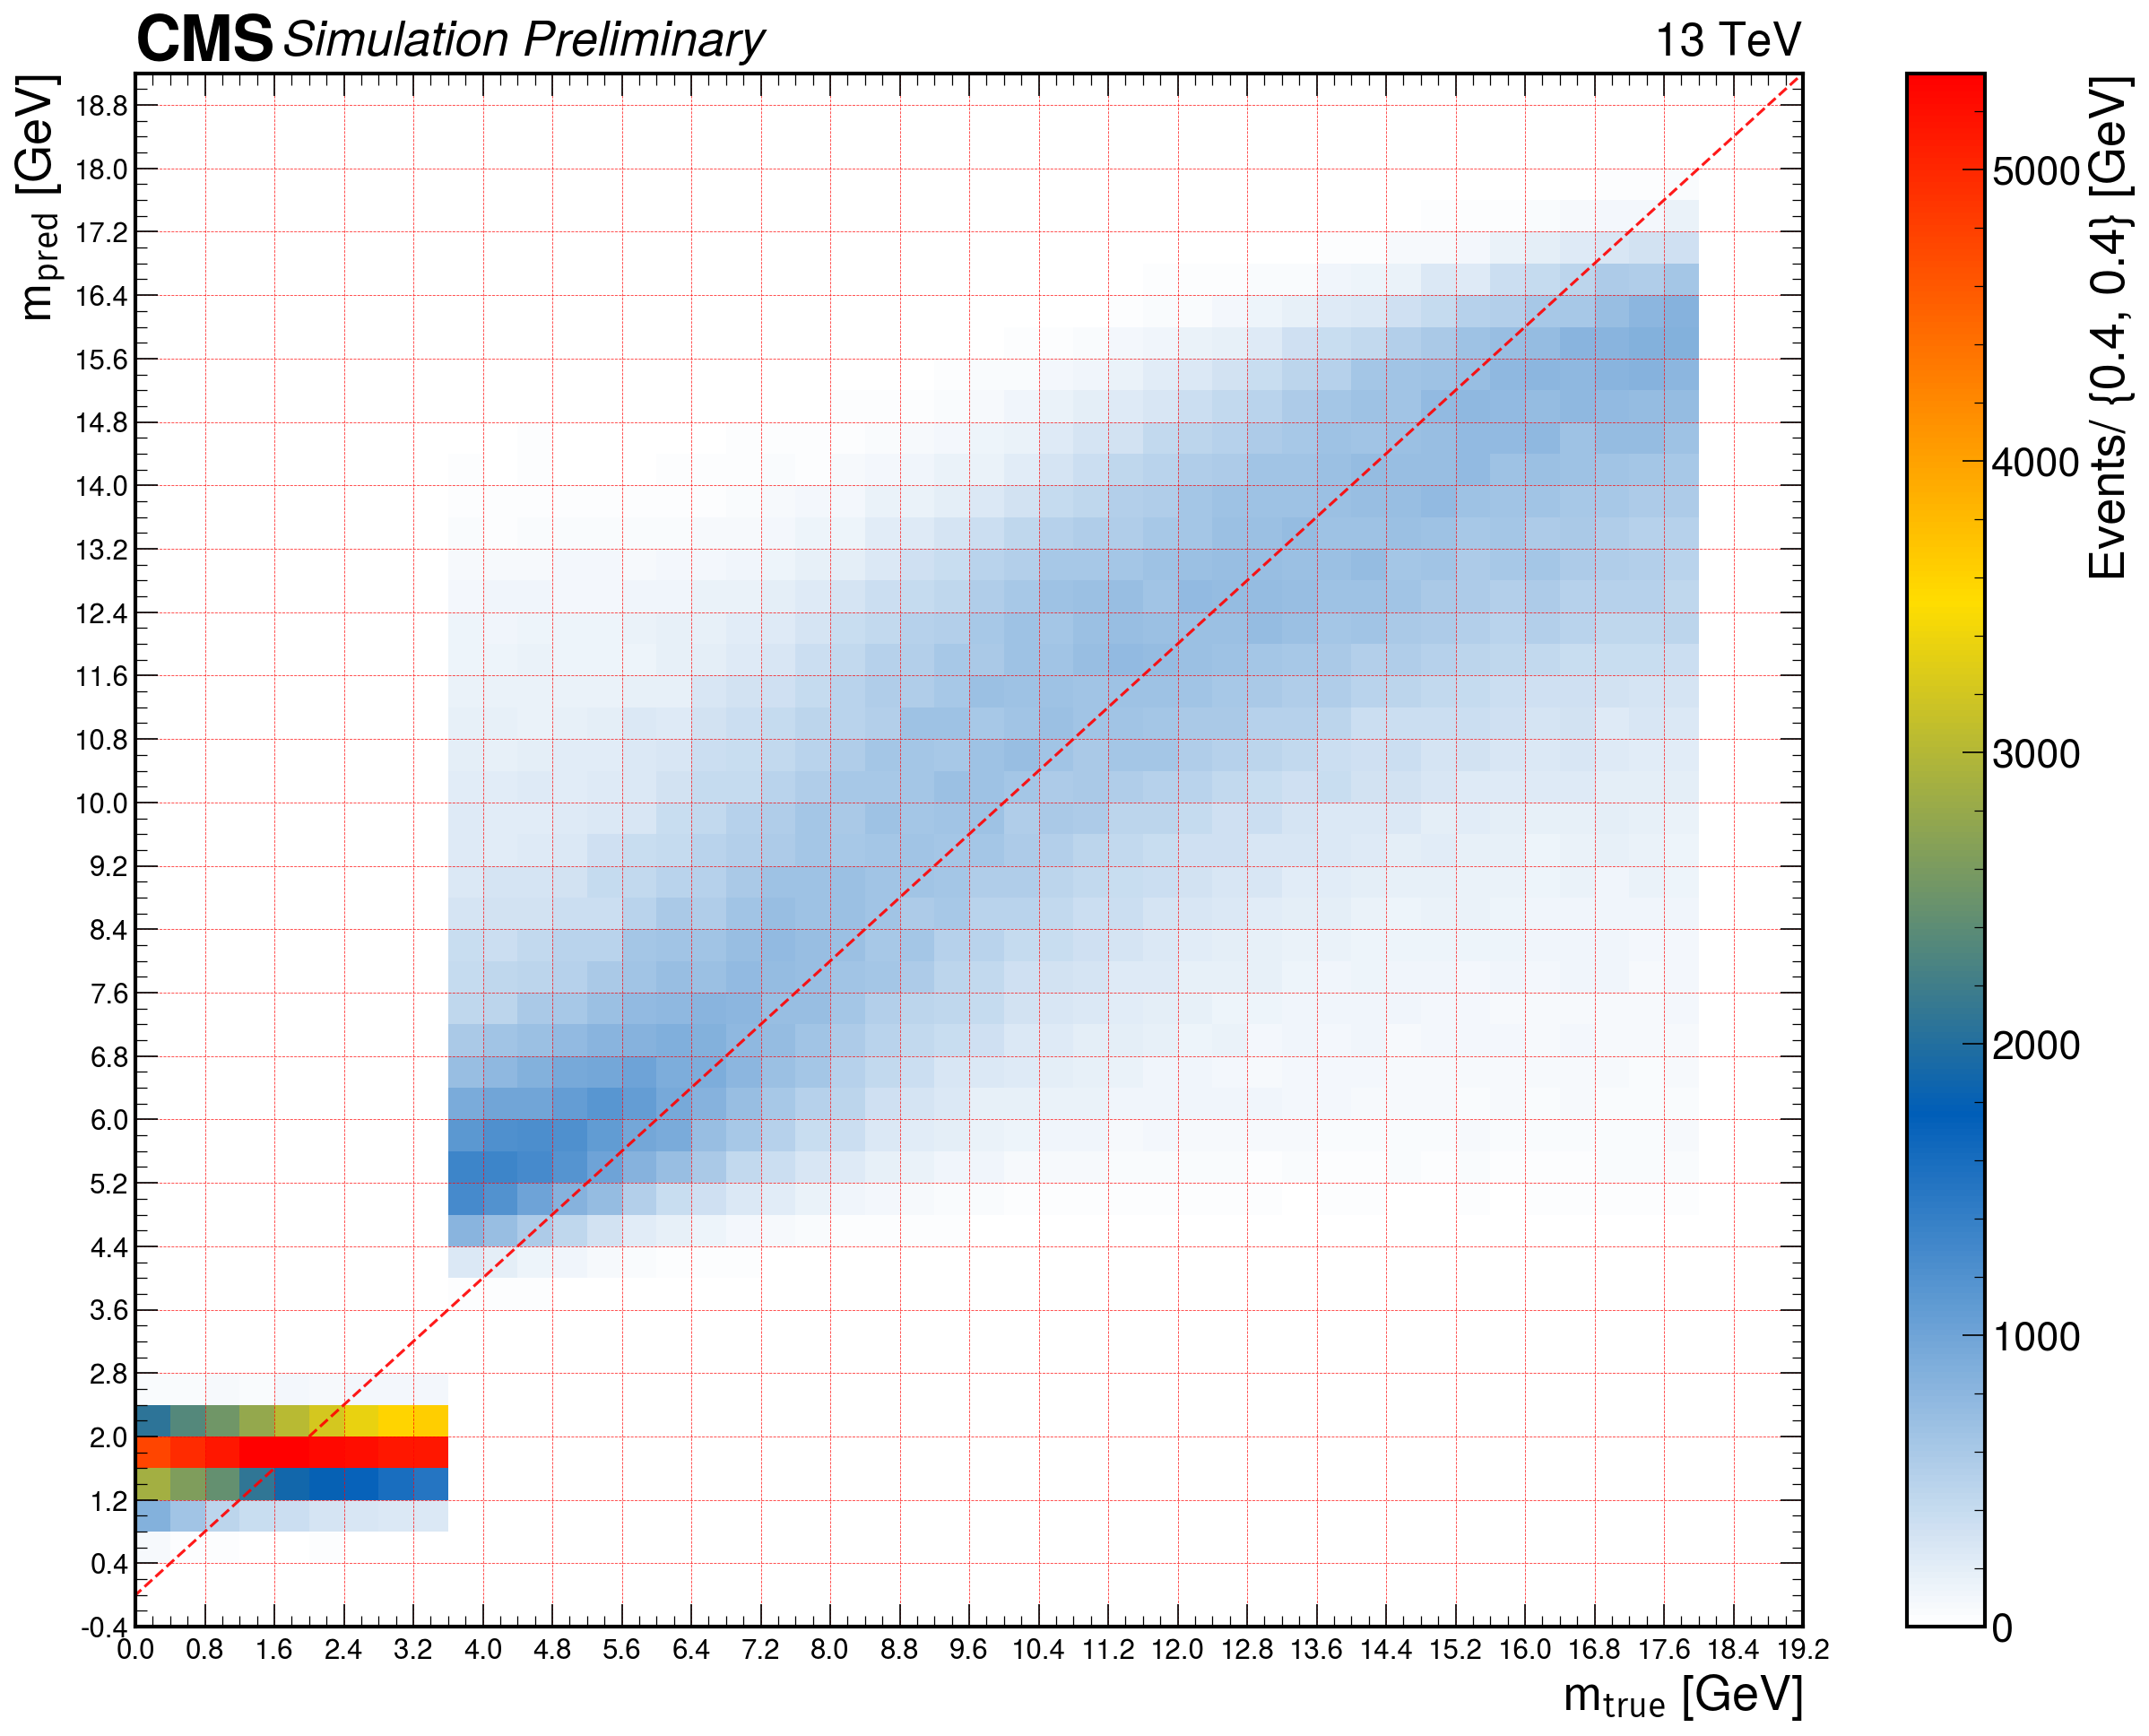

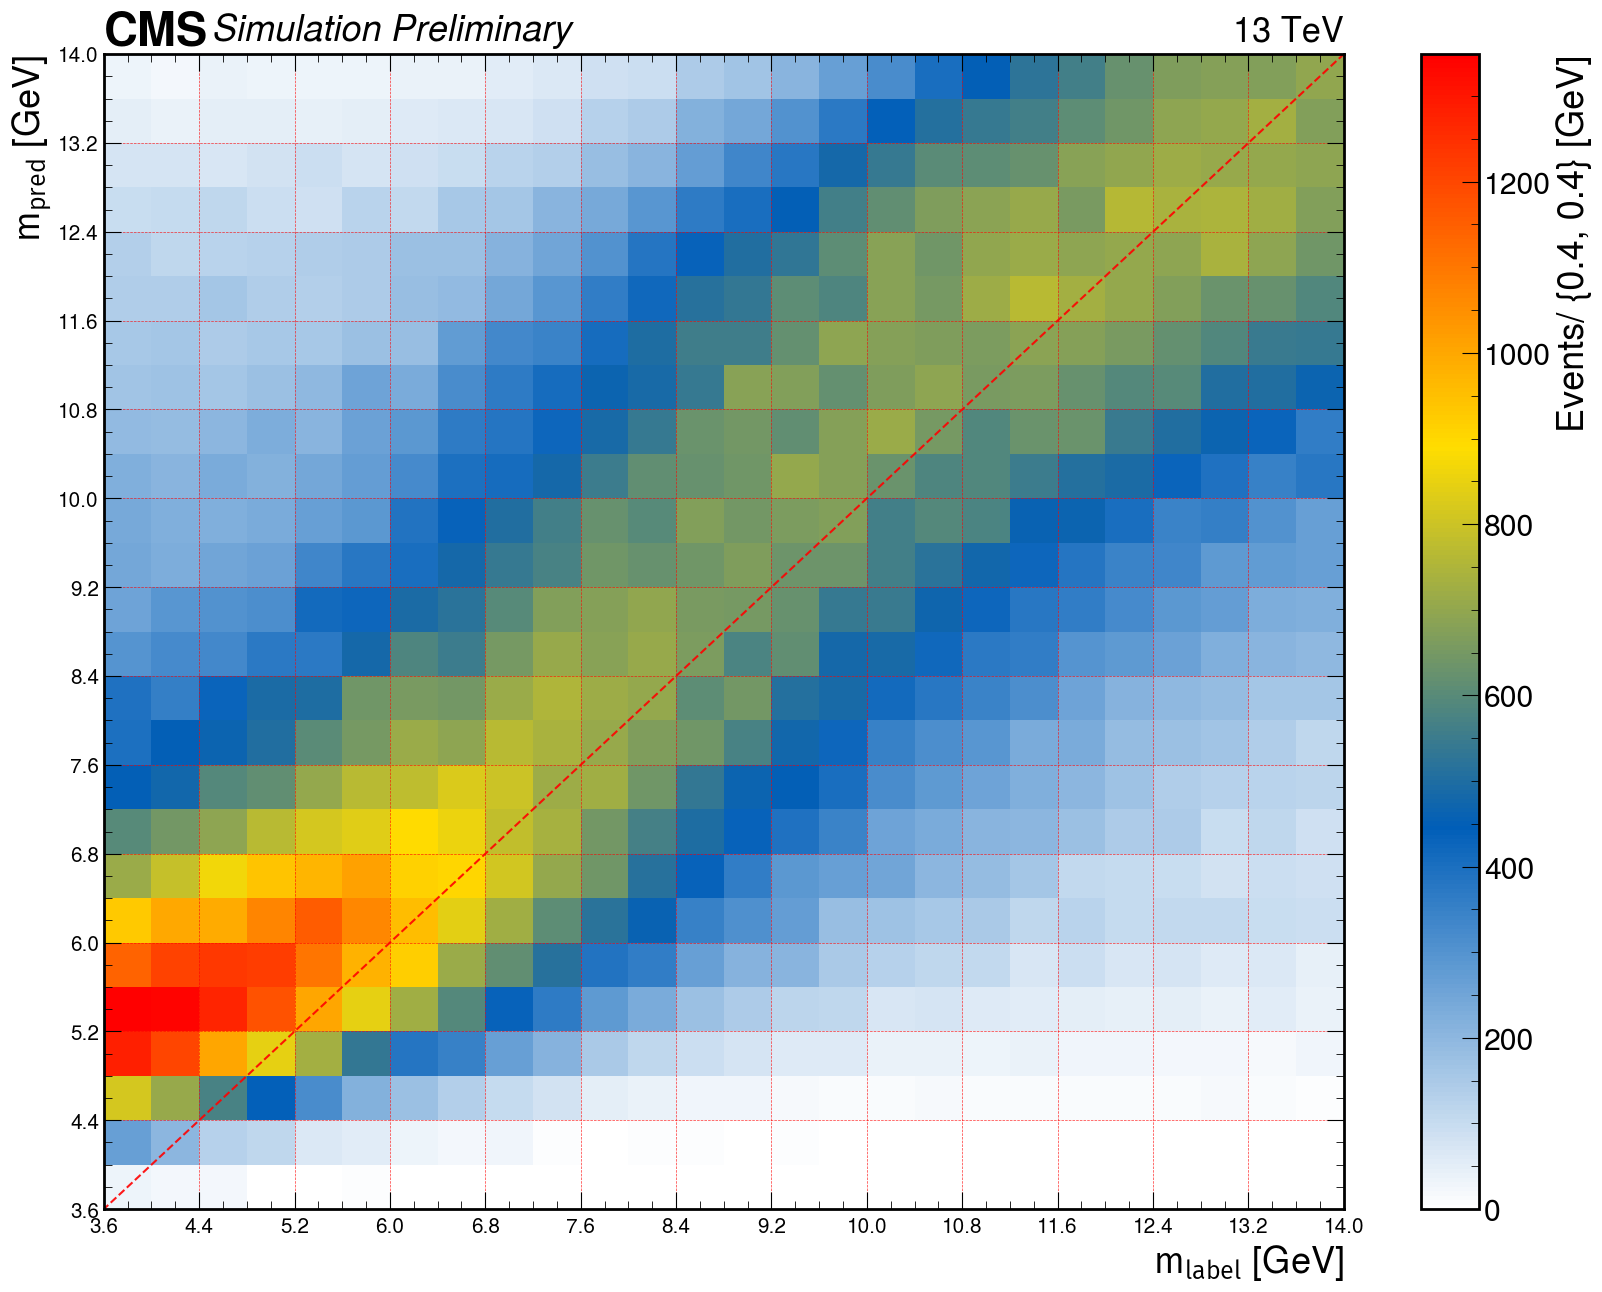

In [6]:
# 2D hist mteru and mpred
# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Truncated version
fig, ax = plt.subplots(figsize=(20,15))
hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(3.6, 14.1, .8),size=15)
plt.yticks(np.arange(3.6, 14.1, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
plt.grid(color='r', linestyle='--', linewidth=.5)

hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

In [20]:
import matplotlib
print(matplotlib.get_backend())


nbAgg


In [21]:
%matplotlib qt